#### Import the neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [258]:
train = pd.read_csv('Data/train.csv')
test_df = pd.read_csv('Data/test.csv')
sample = pd.read_csv('Data/sample_submission2.csv')

#### Data Wrangling

In [3]:
print("Shape of data is ", train.shape)

Shape of data is  (38312, 19)


In [4]:
train.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [5]:
print("Shape of data is ", test.shape)

Shape of data is  (16496, 18)


In [6]:
test.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1
3,YAK/S/00016,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1984,2.5,2009,0,0,52,RIVERS,No,Single,No,No,1
4,YAK/S/00017,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1983,7.5,2014,1,0,69,FCT,Yes,Married,No,No,0


In [7]:
print("Shape of data is ", sample.shape)

Shape of data is  (16496, 2)


Pipeline
1. Clean data (Rename all columns, to lower case conv,Remove missing values, drop duplicates)
2. Univariate analysis 
    i. Categorical
    ii. Continous
3. Bivariate analysis
3. Convert all text to numbers using one hot encoding
4. Machine learning with all features
5. Feature selection (corelation...xgboost etc)
6. Another machine learning prediction with selected features
7. Feature engineering and standardization
8. Machine learning
9. Check the best models and accuracy and submit

In [8]:
print(train.columns)
train.columns = train.columns.str.lower()
print(train.columns)

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not'],
      dtype='object')
Index(['employeeno', 'division', 'qualification', 'gender',
       'channel_of_recruitment', 'trainings_attended', 'year_of_birth',
       'last_performance_score', 'year_of_recruitment', 'targets_met',
       'previous_award', 'training_score_average', 'state_of_origin',
       'foreign_schooled', 'marital_status', 'past_disciplinary_action',
       'previous_intradepartmental_movement', 'no_of_previous_employers',
       'promoted_or_not'],
      dtype='object')


In [243]:
print(test.columns)
test.columns = test.columns.str.lower()
print(test.columns)

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers'],
      dtype='object')
Index(['employeeno', 'division', 'qualification', 'gender',
       'channel_of_recruitment', 'trainings_attended', 'year_of_birth',
       'last_performance_score', 'year_of_recruitment', 'targets_met',
       'previous_award', 'training_score_average', 'state_of_origin',
       'foreign_schooled', 'marital_status', 'past_disciplinary_action',
       'previous_intradepartmental_movement', 'no_of_previous_employers'],
      dtype='object')


In [10]:
# Summarize the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
employeeno                             38312 non-null object
division                               38312 non-null object
qualification                          36633 non-null object
gender                                 38312 non-null object
channel_of_recruitment                 38312 non-null object
trainings_attended                     38312 non-null int64
year_of_birth                          38312 non-null int64
last_performance_score                 38312 non-null float64
year_of_recruitment                    38312 non-null int64
targets_met                            38312 non-null int64
previous_award                         38312 non-null int64
training_score_average                 38312 non-null int64
state_of_origin                        38312 non-null object
foreign_schooled                       38312 non-null object
marital_status                         383

In [11]:
# Check for missing values
train.isnull().sum()

employeeno                                0
division                                  0
qualification                          1679
gender                                    0
channel_of_recruitment                    0
trainings_attended                        0
year_of_birth                             0
last_performance_score                    0
year_of_recruitment                       0
targets_met                               0
previous_award                            0
training_score_average                    0
state_of_origin                           0
foreign_schooled                          0
marital_status                            0
past_disciplinary_action                  0
previous_intradepartmental_movement       0
no_of_previous_employers                  0
promoted_or_not                           0
dtype: int64

In [12]:
# Look at qualifications more
train[['qualification', 'promoted_or_not']].promoted_or_not.value_counts()

0    35071
1     3241
Name: promoted_or_not, dtype: int64

In [13]:
# Null accuracy
not_promoted = train[['qualification', 'promoted_or_not']].promoted_or_not.value_counts()[0]
promoted = train[['qualification', 'promoted_or_not']].promoted_or_not.value_counts()[1]

# null accuracy if the most dorminant class is predicted
not_promoted/(promoted + not_promoted)

0.9154050950093965

In [14]:
train[['qualification', 'promoted_or_not']]

,qualification,promoted_or_not
0,"MSc, MBA and PhD",0
1,First Degree or HND,0
2,First Degree or HND,0
3,First Degree or HND,0
4,First Degree or HND,0
5,First Degree or HND,0
6,"MSc, MBA and PhD",0
7,First Degree or HND,0
8,"MSc, MBA and PhD",0
9,First Degree or HND,1


In [15]:
# Address qualifications, drop it because it has no bearing
train = train.drop(['qualification'], axis=1)

In [16]:
train.shape

(38312, 18)

In [17]:
# Drop duplicates
train = train.drop_duplicates()

#### Univariate analysis
Categorical

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38312 entries, 0 to 38311
Data columns (total 18 columns):
employeeno                             38312 non-null object
division                               38312 non-null object
gender                                 38312 non-null object
channel_of_recruitment                 38312 non-null object
trainings_attended                     38312 non-null int64
year_of_birth                          38312 non-null int64
last_performance_score                 38312 non-null float64
year_of_recruitment                    38312 non-null int64
targets_met                            38312 non-null int64
previous_award                         38312 non-null int64
training_score_average                 38312 non-null int64
state_of_origin                        38312 non-null object
foreign_schooled                       38312 non-null object
marital_status                         38312 non-null object
past_disciplinary_action               383

Categorical variables are division, gender, channel_of_recruitment, state_of_origin, foreign_schooled, marital_status, past_disciplinary_action, previous_intradepartmental_movement, no_of_previous_employers

In [19]:
categorical_variables = ["division", "gender", "channel_of_recruitment", "state_of_origin","foreign_schooled", "marital_status", "past_disciplinary_action", "previous_intradepartmental_movement", "no_of_previous_employers"]
train_categorical = train[categorical_variables]

In [20]:
train_categorical

,division,gender,channel_of_recruitment,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers
0,Commercial Sales and Marketing,Female,Direct Internal process,ANAMBRA,No,Married,No,No,0
1,Customer Support and Field Operations,Male,Agency and others,ANAMBRA,Yes,Married,No,No,0
2,Commercial Sales and Marketing,Male,Direct Internal process,KATSINA,Yes,Married,No,No,0
3,Commercial Sales and Marketing,Male,Agency and others,NIGER,Yes,Single,No,No,1
4,Information and Strategy,Male,Direct Internal process,AKWA IBOM,Yes,Married,No,No,1
5,Customer Support and Field Operations,Female,Agency and others,ENUGU,Yes,Married,No,Yes,1
6,Customer Support and Field Operations,Male,Direct Internal process,OYO,No,Single,No,No,1
7,Information and Strategy,Male,Agency and others,LAGOS,Yes,Married,No,No,0
8,Commercial Sales and Marketing,Male,Direct Internal process,ONDO,Yes,Married,No,No,0
9,Commercial Sales and Marketing,Female,Direct Internal process,LAGOS,Yes,Married,No,No,0


In [21]:
for i in train_categorical.columns:
    print(i, "\n", "\n", "\n", train_categorical[i].value_counts(), "\n", "\n")
    

division 
 
 
 Commercial Sales and Marketing                 11695
Customer Support and Field Operations           7973
Sourcing and Purchasing                         5052
Information Technology and Solution Support     4952
Information and Strategy                        3721
Business Finance Operations                     1786
People/HR Management                            1704
Regulatory and Legal services                    733
Research and Innovation                          696
Name: division, dtype: int64 
 

gender 
 
 
 Male      26880
Female    11432
Name: gender, dtype: int64 
 

channel_of_recruitment 
 
 
 Agency and others                  21310
Direct Internal process            16194
Referral and Special candidates      808
Name: channel_of_recruitment, dtype: int64 
 

state_of_origin 
 
 
 LAGOS          6204
FCT            2389
OGUN           2302
RIVERS         2222
ANAMBRA        1710
KANO           1649
DELTA          1594
OYO            1508
KADUNA         139

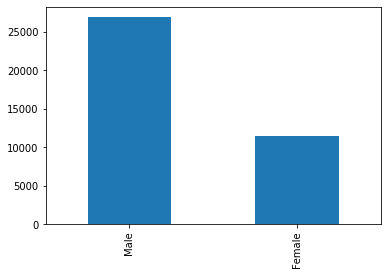

In [22]:
%matplotlib inline
train_categorical['gender'].value_counts().plot(kind='bar')


In [23]:
display(train)

,employeeno,division,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not
0,YAK/S/00001,Commercial Sales and Marketing,Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0
5,YAK/S/00007,Customer Support and Field Operations,Female,Agency and others,2,1990,7.5,2014,0,0,51,ENUGU,Yes,Married,No,Yes,1,0
6,YAK/S/00008,Customer Support and Field Operations,Male,Direct Internal process,2,1988,7.5,2013,0,0,55,OYO,No,Single,No,No,1,0
7,YAK/S/00009,Information and Strategy,Male,Agency and others,2,1993,10.0,2014,0,0,75,LAGOS,Yes,Married,No,No,0,0
8,YAK/S/00010,Commercial Sales and Marketing,Male,Direct Internal process,2,1989,12.5,2014,1,0,46,ONDO,Yes,Married,No,No,0,0
9,YAK/S/00012,Commercial Sales and Marketing,Female,Direct Internal process,2,1986,12.5,2016,1,0,42,LAGOS,Yes,Married,No,No,0,1


#### One hot encoding to change all categorical data to numerical

In [24]:
# Start with binary categorical 
binary_categorical_columns = ['gender', 'past_disciplinary_action', 'previous_intradepartmental_movement', 'foreign_schooled']

In [25]:
train['gender_int'] = train[binary_categorical_columns].gender.map({'Female': 0, 'Male': 1})

In [26]:
train = train.drop('gender', axis=1)

In [27]:
binary_categorical_columns = ['past_disciplinary_action', 'previous_intradepartmental_movement', 'foreign_schooled']
train['past_disciplinary_action_int'] = train[binary_categorical_columns].past_disciplinary_action.map({'No': 0, 'Yes': 1})
train = train.drop('past_disciplinary_action', axis=1)
binary_categorical_columns = ['previous_intradepartmental_movement', 'foreign_schooled']

In [28]:
binary_categorical_columns = ['previous_intradepartmental_movement', 'foreign_schooled']
train['foreign_schooled_int'] = train[binary_categorical_columns].foreign_schooled.map({'No': 0, 'Yes': 1})
train = train.drop('foreign_schooled', axis=1)
binary_categorical_columns = ['previous_intradepartmental_movement']


In [29]:
train['previous_intradepartmental_movement_int'] = train[binary_categorical_columns].previous_intradepartmental_movement.map({'No': 0, 'Yes': 1})
train = train.drop('previous_intradepartmental_movement', axis=1)


In [30]:
display(train)

,employeeno,division,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,marital_status,no_of_previous_employers,promoted_or_not,gender_int,past_disciplinary_action_int,foreign_schooled_int,previous_intradepartmental_movement_int
0,YAK/S/00001,Commercial Sales and Marketing,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,Married,0,0,0,0,0,0
1,YAK/S/00002,Customer Support and Field Operations,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Married,0,0,1,0,1,0
2,YAK/S/00003,Commercial Sales and Marketing,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Married,0,0,1,0,1,0
3,YAK/S/00004,Commercial Sales and Marketing,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Single,1,0,1,0,1,0
4,YAK/S/00006,Information and Strategy,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Married,1,0,1,0,1,0
5,YAK/S/00007,Customer Support and Field Operations,Agency and others,2,1990,7.5,2014,0,0,51,ENUGU,Married,1,0,0,0,1,1
6,YAK/S/00008,Customer Support and Field Operations,Direct Internal process,2,1988,7.5,2013,0,0,55,OYO,Single,1,0,1,0,0,0
7,YAK/S/00009,Information and Strategy,Agency and others,2,1993,10.0,2014,0,0,75,LAGOS,Married,0,0,1,0,1,0
8,YAK/S/00010,Commercial Sales and Marketing,Direct Internal process,2,1989,12.5,2014,1,0,46,ONDO,Married,0,0,1,0,1,0
9,YAK/S/00012,Commercial Sales and Marketing,Direct Internal process,2,1986,12.5,2016,1,0,42,LAGOS,Married,0,1,0,0,1,0


In [31]:
train.corr()

,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,promoted_or_not,gender_int,past_disciplinary_action_int,foreign_schooled_int,previous_intradepartmental_movement_int
trainings_attended,1.000000,0.078710,-0.062042,0.056215,-0.044789,-0.007409,0.041065,-0.024345,0.084906,-0.002260,-0.005108,-0.005871
year_of_birth,0.078710,1.000000,-0.175572,0.654666,0.025337,0.013627,0.048390,0.017991,0.012095,-0.000251,-0.001877,0.011412
last_performance_score,-0.062042,-0.175572,1.000000,-0.190333,0.276350,0.026587,0.057836,0.119690,-0.023586,-0.003065,-0.001923,-0.005478
year_of_recruitment,0.056215,0.654666,-0.190333,1.000000,0.076910,0.041995,0.037477,0.012287,0.017644,0.003217,-0.000253,0.004988
targets_met,-0.044789,0.025337,0.276350,0.076910,1.000000,0.092934,0.077201,0.224518,-0.038382,-0.000264,-0.004294,-0.002965
previous_award,-0.007409,0.013627,0.026587,0.041995,0.092934,1.000000,0.072360,0.201434,0.001773,-0.001374,0.002960,-0.009762
training_score_average,0.041065,0.048390,0.057836,0.037477,0.077201,0.072360,1.000000,0.178448,-0.024311,-0.006620,0.000796,-0.000237
promoted_or_not,-0.024345,0.017991,0.119690,0.012287,0.224518,0.201434,0.178448,1.000000,-0.010437,0.004830,0.003202,-0.008289
gender_int,0.084906,0.012095,-0.023586,0.017644,-0.038382,0.001773,-0.024311,-0.010437,1.000000,0.012799,0.016073,-0.002715
past_disciplinary_action_int,-0.002260,-0.000251,-0.003065,0.003217,-0.000264,-0.001374,-0.006620,0.004830,0.012799,1.000000,-0.001373,-0.000286


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38312 entries, 0 to 38311
Data columns (total 18 columns):
employeeno                                 38312 non-null object
division                                   38312 non-null object
channel_of_recruitment                     38312 non-null object
trainings_attended                         38312 non-null int64
year_of_birth                              38312 non-null int64
last_performance_score                     38312 non-null float64
year_of_recruitment                        38312 non-null int64
targets_met                                38312 non-null int64
previous_award                             38312 non-null int64
training_score_average                     38312 non-null int64
state_of_origin                            38312 non-null object
marital_status                             38312 non-null object
no_of_previous_employers                   38312 non-null object
promoted_or_not                            38312 no

In [36]:
married_df = pd.get_dummies(train.marital_status)
channel_of_recruitment_df = pd.get_dummies(train.channel_of_recruitment)

In [38]:
train = pd.concat([train, married_df, channel_of_recruitment_df], axis=1)

,employeeno,division,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,...,gender_int,past_disciplinary_action_int,foreign_schooled_int,previous_intradepartmental_movement_int,Married,Not_Sure,Single,Agency and others,Direct Internal process,Referral and Special candidates
0,YAK/S/00001,Commercial Sales and Marketing,2,1986,12.5,2011,1,0,41,ANAMBRA,...,0,0,0,0,1,0,0,0,1,0
1,YAK/S/00002,Customer Support and Field Operations,2,1991,12.5,2015,0,0,52,ANAMBRA,...,1,0,1,0,1,0,0,1,0,0
2,YAK/S/00003,Commercial Sales and Marketing,2,1987,7.5,2012,0,0,42,KATSINA,...,1,0,1,0,1,0,0,0,1,0
3,YAK/S/00004,Commercial Sales and Marketing,3,1982,2.5,2009,0,0,42,NIGER,...,1,0,1,0,0,0,1,1,0,0
4,YAK/S/00006,Information and Strategy,3,1990,7.5,2012,0,0,77,AKWA IBOM,...,1,0,1,0,1,0,0,0,1,0
5,YAK/S/00007,Customer Support and Field Operations,2,1990,7.5,2014,0,0,51,ENUGU,...,0,0,1,1,1,0,0,1,0,0
6,YAK/S/00008,Customer Support and Field Operations,2,1988,7.5,2013,0,0,55,OYO,...,1,0,0,0,0,0,1,0,1,0
7,YAK/S/00009,Information and Strategy,2,1993,10.0,2014,0,0,75,LAGOS,...,1,0,1,0,1,0,0,1,0,0
8,YAK/S/00010,Commercial Sales and Marketing,2,1989,12.5,2014,1,0,46,ONDO,...,1,0,1,0,1,0,0,0,1,0
9,YAK/S/00012,Commercial Sales and Marketing,2,1986,12.5,2016,1,0,42,LAGOS,...,0,0,1,0,1,0,0,0,1,0


In [39]:
train = train.drop(['channel_of_recruitment'], axis=1)

In [40]:
train.shape

(38312, 23)

In [42]:
train.drop(['marital_status'], axis=1, inplace=True)

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38312 entries, 0 to 38311
Data columns (total 22 columns):
employeeno                                 38312 non-null object
division                                   38312 non-null object
trainings_attended                         38312 non-null int64
year_of_birth                              38312 non-null int64
last_performance_score                     38312 non-null float64
year_of_recruitment                        38312 non-null int64
targets_met                                38312 non-null int64
previous_award                             38312 non-null int64
training_score_average                     38312 non-null int64
state_of_origin                            38312 non-null object
no_of_previous_employers                   38312 non-null object
promoted_or_not                            38312 non-null int64
gender_int                                 38312 non-null int64
past_disciplinary_action_int               38312 non-

In [44]:
division_df = pd.get_dummies(train.division)
train = pd.concat([train, division_df], axis=1)

In [45]:
train.shape

(38312, 31)

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38312 entries, 0 to 38311
Data columns (total 31 columns):
employeeno                                     38312 non-null object
division                                       38312 non-null object
trainings_attended                             38312 non-null int64
year_of_birth                                  38312 non-null int64
last_performance_score                         38312 non-null float64
year_of_recruitment                            38312 non-null int64
targets_met                                    38312 non-null int64
previous_award                                 38312 non-null int64
training_score_average                         38312 non-null int64
state_of_origin                                38312 non-null object
no_of_previous_employers                       38312 non-null object
promoted_or_not                                38312 non-null int64
gender_int                                     38312 non-null int64
p

In [52]:
train = pd.concat([train, pd.get_dummies(train.no_of_previous_employers, prefix="no_of_previous_employers")], axis=1)


In [53]:
train.shape

(38312, 38)

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38312 entries, 0 to 38311
Data columns (total 38 columns):
employeeno                                     38312 non-null object
division                                       38312 non-null object
trainings_attended                             38312 non-null int64
year_of_birth                                  38312 non-null int64
last_performance_score                         38312 non-null float64
year_of_recruitment                            38312 non-null int64
targets_met                                    38312 non-null int64
previous_award                                 38312 non-null int64
training_score_average                         38312 non-null int64
state_of_origin                                38312 non-null object
no_of_previous_employers                       38312 non-null object
promoted_or_not                                38312 non-null int64
gender_int                                     38312 non-null int64
p

In [57]:
train.drop(['division', 'no_of_previous_employers'], axis=1, inplace=True)

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38312 entries, 0 to 38311
Data columns (total 36 columns):
employeeno                                     38312 non-null object
trainings_attended                             38312 non-null int64
year_of_birth                                  38312 non-null int64
last_performance_score                         38312 non-null float64
year_of_recruitment                            38312 non-null int64
targets_met                                    38312 non-null int64
previous_award                                 38312 non-null int64
training_score_average                         38312 non-null int64
state_of_origin                                38312 non-null object
promoted_or_not                                38312 non-null int64
gender_int                                     38312 non-null int64
past_disciplinary_action_int                   38312 non-null int64
foreign_schooled_int                           38312 non-null int64
pre

In [59]:
state_of_origin_df = pd.get_dummies(train.state_of_origin)
train = pd.concat([train, state_of_origin_df], axis=1)

In [60]:
train.shape

(38312, 73)

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38312 entries, 0 to 38311
Data columns (total 73 columns):
employeeno                                     38312 non-null object
trainings_attended                             38312 non-null int64
year_of_birth                                  38312 non-null int64
last_performance_score                         38312 non-null float64
year_of_recruitment                            38312 non-null int64
targets_met                                    38312 non-null int64
previous_award                                 38312 non-null int64
training_score_average                         38312 non-null int64
state_of_origin                                38312 non-null object
promoted_or_not                                38312 non-null int64
gender_int                                     38312 non-null int64
past_disciplinary_action_int                   38312 non-null int64
foreign_schooled_int                           38312 non-null int64
pre

In [63]:
train.drop(['state_of_origin'], axis=1, inplace=True)

In [64]:
train.shape

(38312, 72)

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38312 entries, 0 to 38311
Data columns (total 72 columns):
employeeno                                     38312 non-null object
trainings_attended                             38312 non-null int64
year_of_birth                                  38312 non-null int64
last_performance_score                         38312 non-null float64
year_of_recruitment                            38312 non-null int64
targets_met                                    38312 non-null int64
previous_award                                 38312 non-null int64
training_score_average                         38312 non-null int64
promoted_or_not                                38312 non-null int64
gender_int                                     38312 non-null int64
past_disciplinary_action_int                   38312 non-null int64
foreign_schooled_int                           38312 non-null int64
previous_intradepartmental_movement_int        38312 non-null int64
Marr

#### Bivariate analysis to check corelation

In [67]:
train.columns

Index(['employeeno', 'trainings_attended', 'year_of_birth',
       'last_performance_score', 'year_of_recruitment', 'targets_met',
       'previous_award', 'training_score_average', 'promoted_or_not',
       'gender_int', 'past_disciplinary_action_int', 'foreign_schooled_int',
       'previous_intradepartmental_movement_int', 'Married', 'Not_Sure',
       'Single', 'Agency and others', 'Direct Internal process',
       'Referral and Special candidates', 'Business Finance Operations',
       'Commercial Sales and Marketing',
       'Customer Support and Field Operations',
       'Information Technology and Solution Support',
       'Information and Strategy', 'People/HR Management',
       'Regulatory and Legal services', 'Research and Innovation',
       'Sourcing and Purchasing', 'no_of_previous_employers_0',
       'no_of_previous_employers_1', 'no_of_previous_employers_2',
       'no_of_previous_employers_3', 'no_of_previous_employers_4',
       'no_of_previous_employers_5', 'no_of_

In [69]:
new_columns=['employeeno', 'trainings_attended', 'year_of_birth',
       'last_performance_score', 'year_of_recruitment', 'targets_met',
       'previous_award', 'training_score_average',
       'gender_int', 'past_disciplinary_action_int', 'foreign_schooled_int',
       'previous_intradepartmental_movement_int', 'Married', 'Not_Sure',
       'Single', 'Agency and others', 'Direct Internal process',
       'Referral and Special candidates', 'Business Finance Operations',
       'Commercial Sales and Marketing',
       'Customer Support and Field Operations',
       'Information Technology and Solution Support',
       'Information and Strategy', 'People/HR Management',
       'Regulatory and Legal services', 'Research and Innovation',
       'Sourcing and Purchasing', 'no_of_previous_employers_0',
       'no_of_previous_employers_1', 'no_of_previous_employers_2',
       'no_of_previous_employers_3', 'no_of_previous_employers_4',
       'no_of_previous_employers_5', 'no_of_previous_employers_More than 5',
       'ABIA', 'ADAMAWA', 'AKWA IBOM', 'ANAMBRA', 'BAUCHI', 'BAYELSA', 'BENUE',
       'BORNO', 'CROSS RIVER', 'DELTA', 'EBONYI', 'EDO', 'EKITI', 'ENUGU',
       'FCT', 'GOMBE', 'IMO', 'JIGAWA', 'KADUNA', 'KANO', 'KATSINA', 'KEBBI',
       'KOGI', 'KWARA', 'LAGOS', 'NASSARAWA', 'NIGER', 'OGUN', 'ONDO', 'OSUN',
       'OYO', 'PLATEAU', 'RIVERS', 'SOKOTO', 'TARABA', 'YOBE', 'ZAMFARA', 'promoted_or_not']

In [71]:
train = train[new_columns]

In [83]:
# split into X and y
X = train.iloc[:, 1:-1]
y = train['promoted_or_not']

In [84]:
print(X.shape)
print(y.shape)

(38312, 70)
(38312,)


In [85]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [86]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30649, 70)
(7663, 70)
(30649,)
(7663,)


In [101]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print("The accuracy is ", accuracy)

The accuracy is  0.9263995824089782


In [102]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(solver='liblinear')
logreg_model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print("The accuracy is ", accuracy)

The accuracy is  0.9263995824089782


In [104]:
# Using cross val scores to validate
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg_model, X, y, cv=10, scoring='accuracy')
print("accuracy without scaling",scores.mean())

0.929473857758766


#### Feature Selection

In [217]:
# # split into X and y
X = train.iloc[:, 1:-1]
y = train['promoted_or_not']

# from scipy.stats import pearsonr
# new_X_columns = []
# for i in X.columns:
#     corr, _ = pearsonr(X[i], y)
#     if corr > 0.15:
#         new_X_columns.append(i)

# X = X[new_X_columns]

In [219]:
X.drop(['year_of_birth', 'year_of_recruitment'], axis=1, inplace=True)

In [220]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(solver='liblinear')

# Using cross val scores to validate
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg_model, X, y, cv=10, scoring='accuracy')
print("accuracy without scaling",scores.mean())


accuracy without scaling 0.9315879158195839


In [213]:
# # Preprocess
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))
# X_scaled = scaler.fit_transform(X)

In [214]:
# scores = cross_val_score(logreg_model, X_scaled, y, cv=10, scoring='accuracy')
# print("accuracy with scaling",scores.mean())

accuracy with scaling 0.9305699865767497


In [222]:
X.shape

(38312, 68)

In [223]:
sample

,EmployeeNo,Promoted_or_Not
0,YAK/S/34385,1
1,YAK/S/27825,1
2,YAK/S/23870,1
3,YAK/S/54784,1
4,YAK/S/25058,1
5,YAK/S/40318,1
6,YAK/S/42912,1
7,YAK/S/27430,1
8,YAK/S/01724,1
9,YAK/S/05043,1


In [256]:
sample.EmployeeNo = test.employeeno

AttributeError: 'DataFrame' object has no attribute 'employeeno'

In [257]:
sample

,EmployeeNo,Promoted_or_Not
0,YAK/S/34385,1
1,YAK/S/27825,1
2,YAK/S/23870,1
3,YAK/S/54784,1
4,YAK/S/25058,1
5,YAK/S/40318,1
6,YAK/S/42912,1
7,YAK/S/27430,1
8,YAK/S/01724,1
9,YAK/S/05043,1


In [248]:
test = test[X.columns]

In [244]:
# Start with binary categorical 
binary_categorical_columns = ['gender', 'past_disciplinary_action', 'previous_intradepartmental_movement', 'foreign_schooled']
test['gender_int'] = test[binary_categorical_columns].gender.map({'Female': 0, 'Male': 1})
test = test.drop('gender', axis=1)
binary_categorical_columns = ['past_disciplinary_action', 'previous_intradepartmental_movement', 'foreign_schooled']
test['past_disciplinary_action_int'] = test[binary_categorical_columns].past_disciplinary_action.map({'No': 0, 'Yes': 1})
test = test.drop('past_disciplinary_action', axis=1)
binary_categorical_columns = ['previous_intradepartmental_movement', 'foreign_schooled']
binary_categorical_columns = ['previous_intradepartmental_movement', 'foreign_schooled']
test['foreign_schooled_int'] = test[binary_categorical_columns].foreign_schooled.map({'No': 0, 'Yes': 1})
test = test.drop('foreign_schooled', axis=1)
binary_categorical_columns = ['previous_intradepartmental_movement']
test['previous_intradepartmental_movement_int'] = test[binary_categorical_columns].previous_intradepartmental_movement.map({'No': 0, 'Yes': 1})
test = test.drop('previous_intradepartmental_movement', axis=1)
married_df = pd.get_dummies(test.marital_status)
channel_of_recruitment_df = pd.get_dummies(test.channel_of_recruitment)
test = pd.concat([test, married_df, channel_of_recruitment_df], axis=1)
test = test.drop(['channel_of_recruitment'], axis=1)
test = pd.concat([test, pd.get_dummies(test.no_of_previous_employers, prefix="no_of_previous_employers")], axis=1)
division_df = pd.get_dummies(test.division)
test = pd.concat([test, division_df], axis=1)
test.drop(['division', 'no_of_previous_employers'], axis=1, inplace=True)
state_of_origin_df = pd.get_dummies(test.state_of_origin)
test = pd.concat([test, state_of_origin_df], axis=1)
test.drop(['state_of_origin'], axis=1, inplace=True)


In [245]:
test = test.drop(['qualification'], axis=1)

In [246]:
test

,employeeno,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,marital_status,gender_int,...,OGUN,ONDO,OSUN,OYO,PLATEAU,RIVERS,SOKOTO,TARABA,YOBE,ZAMFARA
0,YAK/S/00005,2,1976,7.5,2017,0,0,65,Married,1,...,0,0,0,0,0,0,0,0,0,0
1,YAK/S/00011,2,1991,0.0,2018,0,0,69,Married,1,...,1,0,0,0,0,0,0,0,0,0
2,YAK/S/00015,2,1984,7.5,2012,0,0,76,Married,1,...,0,0,0,0,0,0,0,0,0,0
3,YAK/S/00016,2,1984,2.5,2009,0,0,52,Single,1,...,0,0,0,0,0,1,0,0,0,0
4,YAK/S/00017,2,1983,7.5,2014,1,0,69,Married,1,...,0,0,0,0,0,0,0,0,0,0
5,YAK/S/00019,2,1987,12.5,2011,1,0,38,Married,1,...,0,0,0,0,0,0,0,0,0,0
6,YAK/S/00027,2,1990,12.5,2015,1,0,60,Married,1,...,0,0,0,0,0,0,0,0,0,0
7,YAK/S/00028,2,1988,10.0,2015,0,0,71,Married,1,...,0,0,0,0,0,0,0,0,0,0
8,YAK/S/00031,2,1984,12.5,2009,1,0,64,Married,1,...,0,0,0,0,0,0,0,0,0,0
9,YAK/S/00032,3,1995,2.5,2017,0,0,53,Married,1,...,0,0,0,0,0,1,0,0,0,0


In [249]:
X.shape

(38312, 68)

In [250]:
test.shape

(16496, 68)

In [252]:
logreg_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [253]:
prediction = logreg_model.predict(test)

In [255]:
len(prediction)

16496

In [261]:
sample.EmployeeNo = test_df.EmployeeNo

In [263]:
sample.Promoted_or_Not = prediction

In [265]:
sample.to_csv('intercampus1.csv', index=False)